In [1]:
from PIL import Image
import h5py
import anubisPlotUtils as anPlot
import json
import numpy as np
import os
import hist as hi
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
matplotlib.use('TkAgg')  # or 'Qt5Agg', 'GTK3Agg', etc.
import mplhep as hep
hep.style.use([hep.style.ATLAS])
import sys
import ANUBIS_triggered_functions as ANT
import pandas as pd
import matplotlib.backends.backend_pdf
from matplotlib.ticker import MultipleLocator
import plotly
import plotly.graph_objs as go
import plotly.express as px

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm


%matplotlib inline

In [2]:
current_directory=  os.path.dirname(os.getcwd())

data = ANT.importDatafile(current_directory+"\\ProAnubisData\\ATLAS LUMINOSITY\\proAnubis_240403_0227.h5")

In [3]:
data_ATLAS = [sublist[:94230] for sublist in data]
etaHits, phiHits = ANT.divideHitCountsByRPC_Timed(data_ATLAS)

In [4]:
#Time_window for coincidence set at 15 ns.
#Temporal Clustering
coincident_hits_ATLAS = ANT.FindCoincidentHits(etaHits,phiHits,15)

#Spatial Clustering
coincident_hits_ATLAS_clustered = ANT.cluster(coincident_hits_ATLAS)

0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0

In [6]:
#Filter events depending on what you would like to look at.
#filter_events(data,minimum number of chambers hit, minimum number of RPCs hit)
cross_chamber_3_rpc_events = ANT.filter_events(coincident_hits_ATLAS_clustered,2,3)
print("......")
all_6_rpcs = ANT.filter_events(coincident_hits_ATLAS_clustered,3,6)

Number of events in filter = 27227
......
Number of events in filter = 1334


In [17]:
Cosmics = ANT.importFromHDF5File(current_directory+"\\ProAnubisData\\ATLAS LUMINOSITY\\proAnubis_240403_1427_cosmics.h5")

data_cosmics = [sublist[:55489] for sublist in Cosmics]

c_etaHits, c_phiHits = ANT.divideHitCountsByRPC_Timed(data_cosmics)

#Time_window for coincidence set at 15 ns.
#Temporal Clustering
coincident_hits_cosmics = ANT.FindCoincidentHits(c_etaHits,c_phiHits,15)

#Spatial Clustering
coincident_hits_cosmics_clustered = ANT.cluster(coincident_hits_cosmics)

print(len(coincident_hits_cosmics_clustered))

0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1

In [18]:
#Filter events depending on what you would like to look at.
#filter_events(data,minimum number of chambers hit, minimum number of RPCs hit)
cross_chamber_3_rpc_events_cosmics = ANT.filter_events(coincident_hits_cosmics_clustered,2,3)
print("......")
all_6_rpcs_cosmics = ANT.filter_events(coincident_hits_cosmics_clustered,3,6)

Number of events in filter = 9390
......
Number of events in filter = 424


In [9]:
def extract_coords_timed_Chi2(event,max_cluster_size):

    #This function converts spatially clusters in RPCs into x and y coordinates (z given by RPC number)
    # event = ['Event x',TIMEBIN, [[[RPC1_PHI_CLUSTERS],[RPC1_ETA_CLUSTERS]],[[...],[...]],...]

    #Extract x and y coords of cluster in event
    distance_per_phi_channel = 2.7625 #cm
    distance_per_eta_channel = 2.9844 #cm
    
    coords = []

    for RPC in range(6):
        
        x_clusters = [x for x in event[2][RPC][0] if len(x)<=max_cluster_size] #phi direction
        y_clusters = [y for y in event[2][RPC][1] if len(y)<=max_cluster_size] #eta direction

        #Finding size of largest cluster, consider coordinates bad if largest cluster is larger than 6.
        x_clusters_lengths = [len(x) for x in event[2][RPC][0]]
        y_clusters_lengths = [len(y) for y in event[2][RPC][1]]

        max_length = max(max(x_clusters_lengths, default=0), max(y_clusters_lengths, default=0))

        x_coords = []
        y_coords = []

        for x_cluster in x_clusters:
           #x_cluster = [[RPC,CHANNEL,TIME,'phi'],...]
            phi_channels = [x[1] for x in x_cluster]
            phi_times = [t[2] for t in x_cluster]

            #Convert the channel number into a measurement along the RPC.
            x_values = [(phi_channel+0.5)*distance_per_phi_channel for phi_channel in phi_channels]

            #Variance in x coord.
            x_var = (1*distance_per_phi_channel)**2/12

            x_coords.append([np.mean(x_values),x_var,np.average(phi_times)])

        for y_cluster in y_clusters:
            #y_cluster = [[RPC,CHANNEL,TIME,'eta'],...]
            eta_channels_corrected = [31-y[1] for y in y_cluster] #corrected for labelling from 0 to 31.
            eta_times = [t[2] for t in y_cluster]
            y_values = [(channel_num+0.5)*distance_per_eta_channel for channel_num in eta_channels_corrected]
            
            y_var = (1*distance_per_eta_channel)**2 /12
            y_coords.append([np.mean(y_values),y_var])

        if x_coords and y_coords and max_length<6:

            coords.append([x_coords, y_coords])

        else:
            coords.append([[],[],"N"])

    #[x_coords] = [[x,err_x,x_time],...]
    
    #RPC_coords = [x_coords,y_coords,x_times]

    #coords = [[RPC1_coords],[RPC2_coords],[RPC3_coords],...]
    return coords

def extract_DT_DZ_Chi2(coords):

    #coords = [[[x0,var,time],[y0,var],z0],[[x1,var,time],[y1,var],z1],...,[[x5,var,time],[y5,var],z5]]

    times = [[RPC,x[0][2]] for RPC, x in enumerate(coords) if isinstance(x[2], (float, int))]

    #Should already be sorted, but just in case.
    #Sort times by RPC, with RPC at lowest height at first entry.

    if len(times) > 1:

        times_sorted = sorted(times, key=lambda x: x[0])

        #print(times_sorted)

        dT = times_sorted[-1][1]-times_sorted[0][1]
        #if dT>0 this implies the particles hit the higher RPC after the lower one, so the particle is travelling upwards here.
        #Vice-versa for dT < 0 

        RPC_heights = [0.6,1.8,3.0,61.8,121.8,123] #Heights of middle point of each RPC, measured from the bottom of the Triplet Low RPC. Units are cm.

        first_RPC = times_sorted[0][0]
        last_RPC = times_sorted[-1][0]

        dZ = RPC_heights[last_RPC] - RPC_heights[first_RPC]
    
        return dT, dZ
    else:
        pass

def fit_event_chi2(coordinates_with_error):
    #Coordinates = [[[x0,var,time],[y0,var],z0],[[x1,var,time],[y1,var],z1],...,[[x5,var,time],[y5,var],z5]]
    #Z coordinate given by height of relevant RPC.
    #Using SVD

    # Calculate dT for event, in ns
    dT, dZ = extract_DT_DZ_Chi2(coordinates_with_error)
    
    coordinates = []

    for coords in coordinates_with_error:
        coordinates.append([coords[0][0],coords[1][0],coords[2]])

    centroid = np.mean(coordinates, axis=0)
    subtracted = coordinates-centroid

    # performing SVD
    _, _, V = np.linalg.svd(subtracted)
    
    # find the direction vector (which is the right singular vector corresponding to the largest singular value)
    direction = V[0, :]

    # A line is defined by the average and its direction
    p0 = centroid
    d = direction

    #Work out Chi2. Minimise this to find best fit (from possible combos)

    Chi2 = 0

    i = 0 

    for point in coordinates_with_error:
        
        i+=2
        
        z = point[2]
        x = point[0][0]
        y = point[1][0]
        x_var = point[0][1]
        y_var = point[1][1]

        z_0 = centroid[2]

        # t = (z-z_0)/d_z

        t = (z-z_0)/d[2]

        # Find expected (x,y) coordinates at that height.

        x_traj = centroid[0] + t*d[0]
        y_traj = centroid[1] + t*d[1]

        Chi2_x = (x-x_traj)**2 / x_var
        Chi2_y = (y-y_traj)**2 / y_var

        Chi2+= Chi2_x
        Chi2+= Chi2_y

    # i is number of fitted points. There are 4 fitted paramters, 2 for each x and y. 
    doF = i - 4

    Chi2 = Chi2/ doF

    return p0, d, Chi2, coordinates, dT, dZ

def generate_hit_coords_combo_Chi2(coords, RPC_heights, combinations=None, hit_coords=None, depth=0):

    if combinations is None:
        combinations = []
    if hit_coords is None:
        hit_coords = []

    if depth == len(coords):
        combinations.append(hit_coords.copy())
        return combinations

    x_values = coords[depth][0]
    y_values = coords[depth][1]

    if not x_values or not y_values:
        return generate_hit_coords_combo_Chi2(coords, RPC_heights, combinations, hit_coords, depth + 1)

    for x in x_values:
        for y in y_values:
            if x is not None and y is not None and isinstance(x[0], (int, float)) and isinstance(y[0], (int, float)):
                hit_coords.append([x, y, RPC_heights[depth]])
                generate_hit_coords_combo_Chi2(coords, RPC_heights, combinations, hit_coords, depth + 1)
                hit_coords.pop()

    return combinations

def reconstruct_timed_Chi2(event,max_cluster_size):

    #timed tag indicates that timing information from RPC is used to determine direction of vertical transversal of "particle" in the event.

    max_Chi2 = 10

    # event = ['Event x',TIMEBIN, [[[RPC1_PHI_CLUSTERS],[RPC1_ETA_CLUSTERS]],[[...],[...]],...]
    RPC_heights = [0.6,1.8,3.0,61.8,121.8,123] #Heights of middle point of each RPC, measured from the bottom of the Triplet Low RPC. Units are cm.

    #Extract x and y coords of cluster in event

    coords = extract_coords_timed_Chi2(event,max_cluster_size)

    # Count the number of empty RPCs
    empty_RPC_count = sum(1 for item in coords if item == [[], [],'N'])

    # If less than 3 elements of coords are occupied, exit the function
    if empty_RPC_count > 3:
        #print("Failed to reconstruct, not enough coords")
        return None  # Exit the function
    
    #NEED TO CHECK IF STILL CROSS CHAMBER! 

    cross_chamberness = 0

    if coords[0] != [[], [], 'N'] or coords[1] != [[], [], 'N'] or coords[2] != [[], [], 'N']:
        cross_chamberness += 1

    if coords[3] != [[], [], 'N']:
        cross_chamberness += 1

    if coords[4] != [[], [], 'N'] or coords[5] != [[], [], 'N']:
        cross_chamberness += 1

    if cross_chamberness < 2:
        #print("Failed to reconstruct, too few chambers")
        return None

    #ITERATING OVER EVERY POSSIBLE COMBINATION OF x,y,z over all 3 RPCs (limited to one x,y per RPC).
    #Doesn't look particularly nice, but there are not many coordinates to loop over usually....

    combinations = ANT.generate_hit_coords_combo_Chi2(coords,RPC_heights)

    #Now for each combo in combinations, attempt to reconstruct a path. See which one gives the best trajectory.

    #If success, print parameters of fitting function.
    #If fail, print reconstruction failed.

    Chi2_current = np.inf
    optimised_coords = None
    optimised_d= None
    optimised_centroid= None
    dT = np.inf

    for ind,combo in enumerate(combinations):

        centroid, d, Chi2, coordinates, delta_T, delta_Z= fit_event_chi2(combo)
        if Chi2 < Chi2_current:

            # If new fit is better than old then replace old fit properties.
            dZ = delta_Z 
            dT = delta_T
            Chi2_current = Chi2
            optimised_centroid = centroid
            optimised_d = d
            optimised_coords = coordinates

    #if dT>0 this implies the particles hit the higher RPC after the lower one, so the particle is travelling upwards here.
    #Vice-versa for dT < 0.

    #dT = 0 case?
    
    if dT != np.inf:

        if dT > 0:
            if optimised_d[2] < 0:
                optimised_d = np.multiply(optimised_d,-1)
        else:
            if optimised_d[2] > 0:
                optimised_d = np.multiply(optimised_d,-1)

        if Chi2_current<max_Chi2:
            return optimised_centroid, optimised_d, optimised_coords, combinations, Chi2_current, dT, dZ

        else:
            #print("Failed to reconstruct, Chi2 too large")
            #return optimised_centroid, optimised_d, optimised_coords, combinations, residuals_current
            return None
    

In [10]:
def extract_angles_phi_eta_timed_DZ(filtered_events):

    #Input is filtered_events, output of ANT.filter_events() function

    angles_eta = []
    angles_phi = []
    delta_times = []
    dZ = []
    chi2_values = []

    for i,filtered_event in enumerate(filtered_events):

        print(f"Index= {i}") 
        
        result = reconstruct_timed_Chi2(filtered_event,3)

        if result is not None:

            delta_times.append(result[5])

            chi2_values.append(result[4])

            if abs(result[5])>40:
                print(f"Index of abnormal event= {i}")
            #Only save angles that actually were reconstructed well

            dZ.append(result[6])
            
            # a.b = |a||b|cos(x)

            #eta angle. 
            #work out the projection of the direction vector in the plane.
            
            v_parr_eta = np.array([0,result[1][1],result[1][2]])

            theta_eta = np.arccos(np.dot(v_parr_eta,[0,0,1]) / np.linalg.norm(v_parr_eta))

            if theta_eta > np.pi / 2:
                theta_eta= np.pi - theta_eta
            
            if v_parr_eta[1] > 0:
                theta_eta*=-1

            angles_eta.append(theta_eta)

            # Phi angles
            #work out the projection of the direction vector in the plane.
            
            v_parr_phi = np.array([result[1][0],0,result[1][2]])

            theta_phi = np.arccos(np.dot(v_parr_phi,[0,0,1]) / np.linalg.norm(v_parr_phi))

            if theta_phi > np.pi / 2:
                theta_phi= np.pi - theta_phi
            
            if v_parr_phi[0] < 0:
                theta_phi*=-1

            angles_phi.append(theta_phi)

    return angles_eta, angles_phi, delta_times, dZ, chi2_values

In [13]:
def plot_time_distribution_fraction_2(times1, times2, title):
    # Flatten the arrays if they are multidimensional
    times1 = np.asarray(times1).flatten()
    times2 = np.asarray(times2).flatten()

    plt.figure(figsize=(16, 10))
    
    # Define bin edges centered on integers between -20 and +20
    bin_edges = np.arange(-20.5, 21.5, 1)

    # Plot histogram with counts
    plt.hist(times1, bins=bin_edges, range=[-20,20], density=True, edgecolor='black',label='Two Chambers')
    plt.hist(times2, bins=bin_edges, range=[-20,20], density=True, edgecolor='black', alpha=0.5, color = 'green', label='Three Chambers')

    # Set x-ticks spacing to 1
    plt.xticks(np.arange(-20, 21, 2))

    plt.xlim(-20,20)

    # Customize the plot
    plt.xlabel('dT / ns')
    plt.ylabel('Fraction')
    plt.title(title)
    plt.legend()
    plt.grid(False)
    plt.show()

In [19]:
def plot_time_distribution_absolute_2(times1, times2, title):
    # Flatten the arrays if they are multidimensional
    times1 = np.asarray(times1).flatten()
    times2 = np.asarray(times2).flatten()

    plt.figure(figsize=(16, 10))

    # Define bin edges centered on integers between -20 and +20
    bin_edges = np.arange(-20.5, 21.5, 1)

    # Plot histogram with counts
    plt.hist(times1, bins=bin_edges, range=[-20,20], density=False, edgecolor='black',label='Three Chambers, Cosmics')
    plt.hist(times2, bins=bin_edges, range=[-20,20], density=False, edgecolor='black', alpha=0.5, color = 'green', label='Three Chambers, Luminosity Spike')

    # Set x-ticks spacing to 1
    plt.xticks(np.arange(-20, 21, 2))
    plt.xlim(-20,20)

    # Customize the plot
    plt.xlabel('dT / ns')
    plt.ylabel('Count')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

In [14]:
angles_eta, angles_phi, times_delta, dZ, chi2_values = extract_angles_phi_eta_timed_DZ(cross_chamber_3_rpc_events)

Index= 0
Index= 1
Index= 2
Index= 3
Index= 4
Index= 5
Index= 6
Index= 7
Index= 8
Index= 9
Index= 10
Index= 11
Index= 12
Index= 13
Index= 14
Index= 15
Index= 16
Index= 17
Index= 18
Index= 19
Index= 20
Index= 21
Index= 22
Index= 23
Index= 24
Index= 25
Index= 26
Index= 27
Index= 28
Index= 29
Index= 30
Index= 31
Index= 32
Index= 33
Index= 34
Index= 35
Index= 36
Index= 37
Index= 38
Index= 39
Index= 40
Index= 41
Index= 42
Index= 43
Index= 44
Index= 45
Index= 46
Index= 47
Index= 48
Index= 49
Index= 50
Index= 51
Index= 52
Index= 53
Index= 54
Index= 55
Index= 56
Index= 57
Index= 58
Index= 59
Index= 60
Index= 61
Index= 62
Index= 63
Index= 64
Index= 65
Index= 66
Index= 67
Index= 68
Index= 69
Index= 70
Index= 71
Index= 72
Index= 73
Index= 74
Index= 75
Index= 76
Index= 77
Index= 78
Index= 79
Index= 80
Index= 81
Index= 82
Index= 83
Index= 84
Index= 85
Index= 86
Index= 87
Index= 88
Index= 89
Index= 90
Index= 91
Index= 92
Index= 93
Index= 94
Index= 95
Index= 96
Index= 97
Index= 98
Index= 99
Index= 100

In [20]:
angles_eta_cosmics, angles_phi_cosmics, times_delta_cosmics, dZ_cosmics, chi2_values_cosmics = extract_angles_phi_eta_timed_DZ(cross_chamber_3_rpc_events_cosmics)

Index= 0
Index= 1
Index= 2
Index= 3
Index= 4
Index= 5
Index= 6
Index= 7
Index= 8
Index= 9
Index= 10
Index= 11
Index= 12
Index= 13
Index= 14
Index= 15
Index= 16
Index= 17
Index= 18
Index= 19
Index= 20
Index= 21
Index= 22
Index= 23
Index= 24
Index= 25
Index= 26
Index= 27
Index= 28
Index= 29
Index= 30
Index= 31
Index= 32
Index= 33
Index= 34
Index= 35
Index= 36
Index= 37
Index= 38
Index= 39
Index= 40
Index= 41
Index= 42
Index= 43
Index= 44
Index= 45
Index= 46
Index= 47
Index= 48
Index= 49
Index= 50
Index= 51
Index= 52
Index= 53
Index= 54
Index= 55
Index= 56
Index= 57
Index= 58
Index= 59
Index= 60
Index= 61
Index= 62
Index= 63
Index= 64
Index= 65
Index= 66
Index= 67
Index= 68
Index= 69
Index= 70
Index= 71
Index= 72
Index= 73
Index= 74
Index= 75
Index= 76
Index= 77
Index= 78
Index= 79
Index= 80
Index= 81
Index= 82
Index= 83
Index= 84
Index= 85
Index= 86
Index= 87
Index= 88
Index= 89
Index= 90
Index= 91
Index= 92
Index= 93
Index= 94
Index= 95
Index= 96
Index= 97
Index= 98
Index= 99
Index= 100

C:\Users\patri\AppData\Local\Temp\ipykernel_11864\3898663393.py:138: RuntimeWarning: divide by zero encountered in scalar divide
  t = (z-z_0)/d[2]
C:\Users\patri\AppData\Local\Temp\ipykernel_11864\3898663393.py:142: RuntimeWarning: invalid value encountered in scalar multiply
  x_traj = centroid[0] + t*d[0]


Index= 1133
Index= 1134
Index= 1135
Index= 1136
Index= 1137
Index= 1138
Index= 1139
Index= 1140
Index= 1141
Index= 1142
Index= 1143
Index= 1144
Index= 1145
Index= 1146
Index= 1147
Index= 1148
Index= 1149
Index= 1150
Index= 1151
Index= 1152
Index= 1153
Index= 1154
Index= 1155
Index= 1156
Index= 1157
Index= 1158
Index= 1159
Index= 1160
Index= 1161
Index= 1162
Index= 1163
Index= 1164
Index= 1165
Index= 1166
Index= 1167
Index= 1168
Index= 1169
Index= 1170
Index= 1171
Index= 1172
Index= 1173
Index= 1174
Index= 1175
Index= 1176
Index= 1177
Index= 1178
Index= 1179
Index= 1180
Index= 1181
Index= 1182
Index= 1183
Index= 1184
Index= 1185
Index= 1186
Index= 1187
Index= 1188
Index= 1189
Index= 1190
Index= 1191
Index= 1192
Index= 1193
Index= 1194
Index= 1195
Index= 1196
Index= 1197
Index= 1198
Index= 1199
Index= 1200
Index= 1201
Index= 1202
Index= 1203
Index= 1204
Index= 1205
Index= 1206
Index= 1207
Index= 1208
Index= 1209
Index= 1210
Index= 1211
Index= 1212
Index= 1213
Index= 1214
Index= 1215
Inde

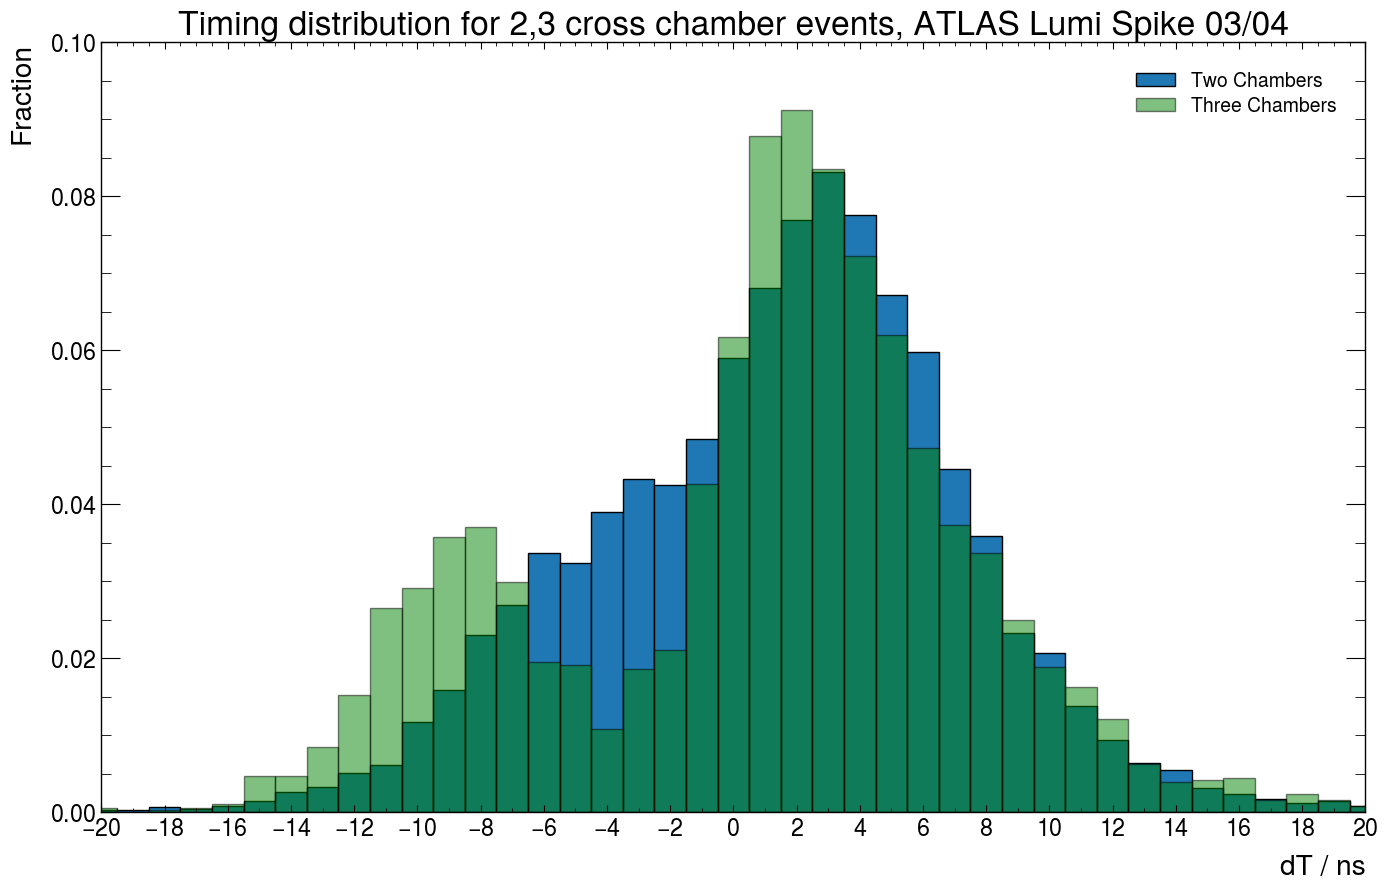

In [15]:
three_chambers = [dT for dZ, dT in zip(dZ, times_delta) if dZ > 90] 
two_chambers = [dT for dZ, dT in zip(dZ, times_delta) if 40< dZ < 80]

plot_time_distribution_fraction_2(two_chambers,three_chambers,"Timing distribution for 2,3 cross chamber events, ATLAS Lumi Spike 03/04")

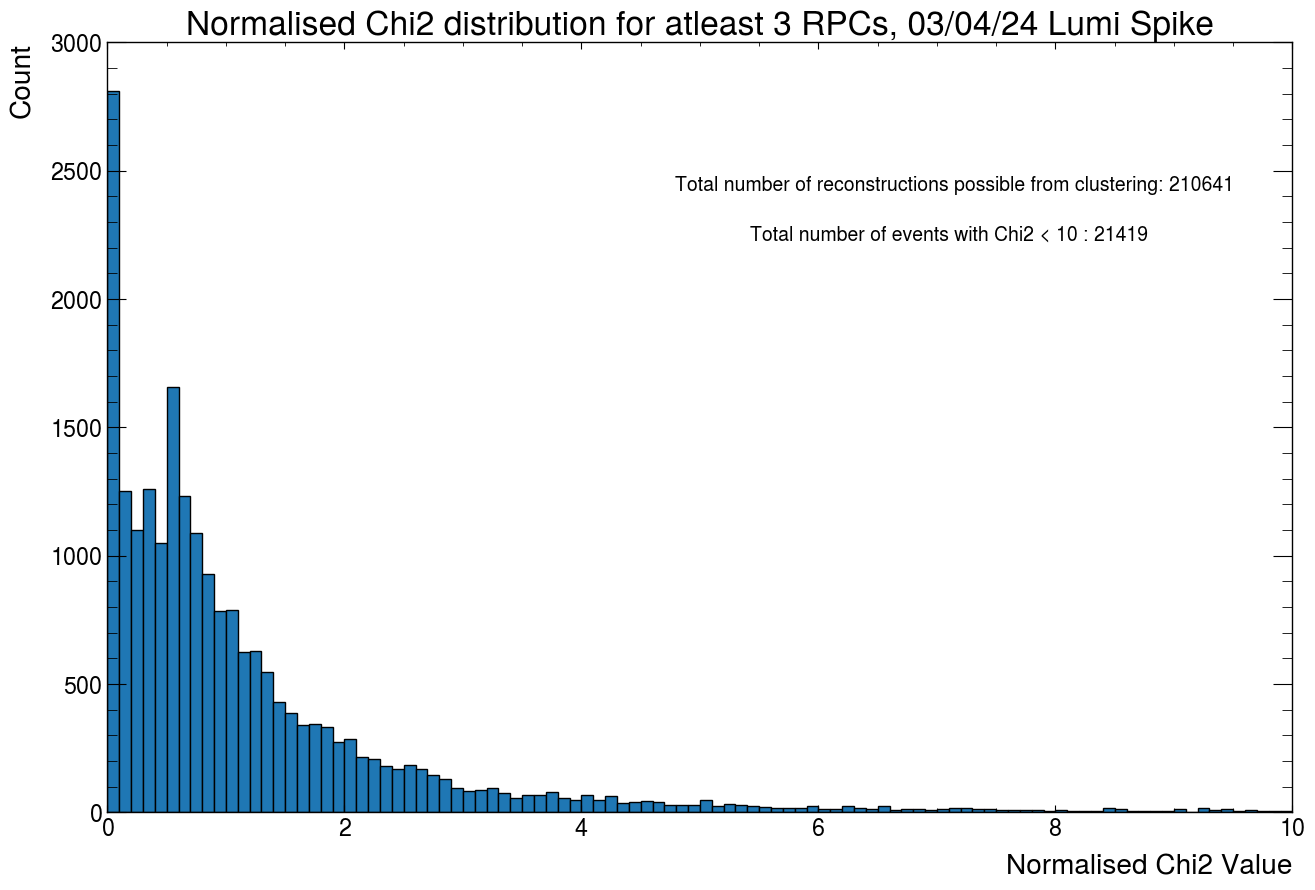

In [16]:
Chi2_values_filtered = [x for x in chi2_values if x <= 10]

plt.figure(figsize=(15,10))

bin_edges = np.arange(-0.5, 11.5, 0.1)

plt.hist(Chi2_values_filtered,density=False,edgecolor='black',bins=bin_edges)

#plt.xlim(0,100)
#plt.yscale('log')

plt.xlabel('Normalised Chi2 Value')
plt.ylabel('Count')

plt.xlim(0,10)

plt.annotate(f"Total number of reconstructions possible from clustering: {len(coincident_hits_ATLAS_clustered)}",(0.45,0.7),xycoords='figure fraction')
plt.annotate(f"Total number of events with Chi2 < 10 : {len(Chi2_values_filtered)}",(0.5,0.65),xycoords='figure fraction')

plt.title('Normalised Chi2 distribution for atleast 3 RPCs, 03/04/24 Lumi Spike')

plt.show()

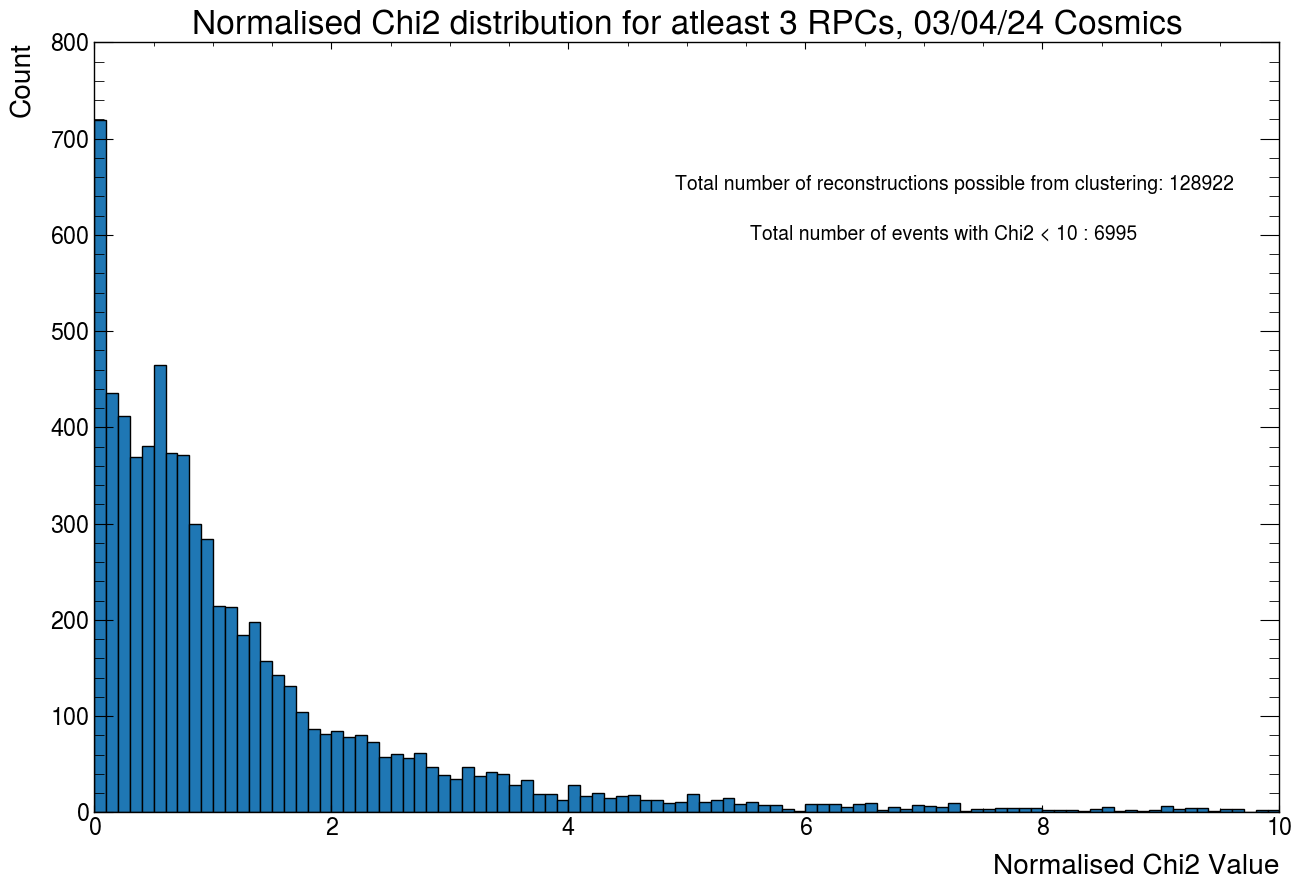

In [21]:
Chi2_values_filtered = [x for x in chi2_values_cosmics if x <= 10]

plt.figure(figsize=(15,10))

bin_edges = np.arange(-0.5, 11.5, 0.1)

plt.hist(Chi2_values_filtered,density=False,edgecolor='black',bins=bin_edges)

#plt.xlim(0,100)
#plt.yscale('log')

plt.xlabel('Normalised Chi2 Value')
plt.ylabel('Count')

plt.xlim(0,10)

plt.annotate(f"Total number of reconstructions possible from clustering: {len(coincident_hits_cosmics_clustered)}",(0.45,0.7),xycoords='figure fraction')
plt.annotate(f"Total number of events with Chi2 < 10 : {len(Chi2_values_filtered)}",(0.5,0.65),xycoords='figure fraction')

plt.title('Normalised Chi2 distribution for atleast 3 RPCs, 03/04/24 Cosmics')

plt.show()

In [ ]:
three_chambers = [dT for dZt, dT in zip(dZ, times_delta) if dZt > 90] 
three_chambers_cosmics = [dT for dZ, dT in zip(dZ_cosmics, times_delta_cosmics) if dZ > 90] 

plot_time_distribution_absolute_2(three_chambers_cosmics,three_chambers, "Timing distribution for three chamber events")